In [1]:
# Y. Kasetty

In [716]:
!python -V

Python 3.7.5


In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


from sodapy import Socrata

pd.set_option('display.max_columns',None)

#### I used Socrata open data api to get data for 2017 only. I obtained it in batches of 500K rows and concatenated them and saved them to disk. I updated the offset manually and verified the first and last rows obtained after each batch.

In [ ]:
# get data using soda

In [ ]:
'''
data_url='data.cityofnewyork.us' 
data_set='erm2-nwe9'   

app_token='KtYnbTc29H18BPslmA9CCHM5I'  
client = Socrata(data_url,app_token) 

client.timeout = 60

# data is received as a list of dictionaries
results = client.get(data_set, where="created_date between '2017-01-01' and '2017-12-31'", limit=500000, offset=2000001)

# Convert Pandas df
df5 = pd.DataFrame.from_records(results)

# Save the data frame to a CSV file (previously saved df1, df2, df3, df4)
df5.to_csv('df5.csv')

# multiple csv files are read from disk and concatenated
frames = [df1,df2,df3,df4,df5]
df = pd.concat(frames,axis=0,ignore_index=True)

'''

In [2]:
df = pd.read_csv('2017_data.csv')

/opt/conda/envs/data3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(df)

2485826

## 2017 Reporting

#### 1. Consider only the 10 most common overall complaint types. For each borough, how many of each of those 10 types were there in 2017?

In [ ]:
# rows that do not specifiy a borough (i.e., unspecified) seems to have recorded calls from outside of the city and 
# also from other states such as NJ, PA etc.. One option would have been to pick cities (for the 'city' column) in New York 
# and assign relevant borough. For this analysis, borough classified as "Unspecified" is dropped.

In [5]:
# remove rows where borough = Unspecified
df = df[df.borough != 'Unspecified']

In [4]:
len(df)

2447427

In [2]:
#df.to_csv('df_5_boroughs.csv',index=False)
df = pd.read_csv('df_5_boroughs.csv')

/opt/conda/envs/data3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8,35,36,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.complaint_type.nunique()

215

In [721]:
df.location_type.value_counts()

RESIDENTIAL BUILDING                    562336
Street/Sidewalk                         451877
Residential Building/House              242313
Street                                  212972
Sidewalk                                193330
Store/Commercial                         32799
Club/Bar/Restaurant                      22030
Property Address                         21460
Park                                     19022
3+ Family Apt. Building                  15576
Senior Address                           13444
Restaurant/Bar/Deli/Bakery               12046
1-, 2- and 3- Family Home                10851
1-2 Family Dwelling                      10520
Lot                                       8667
Mixed Use                                 8202
Park/Playground                           7219
Other (Explain Below)                     6622
Comercial                                 5711
3+ Family Apartment Building              4905
Other                                     4366
Highway      

In [727]:
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,address_type,city,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,cross_street_1,cross_street_2,bbl,intersection_street_1,intersection_street_2,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,landmark,vehicle_type
0,35144300,2017-01-01T00:00:00.000,2017-01-11T00:00:00.000,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11207.0,650 WILSON AVENUE,WILSON AVENUE,LATLONG,BROOKLYN,NaN,Closed,2017-01-31T16:43:49.000,The Department of Health and Mental Hygiene wi...,2017-01-11T00:00:00.000,Unspecified BROOKLYN,BROOKLYN,1010640.0,190241.0,MOBILE,Unspecified,BROOKLYN,40.688806,-73.904839,"{'latitude': '40.6888061', 'longitude': '-73.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35144883,2017-01-01T00:00:00.000,2017-01-01T00:00:00.000,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10459.0,801 LA 65 DE INFANTER?A,LA 65 DE INFANTER?A,LATLONG,BRONX,NaN,Closed,2017-01-31T21:17:53.000,The Department of Health and Mental Hygiene wi...,2017-01-01T00:00:00.000,Unspecified BRONX,BRONX,1012994.0,236814.0,MOBILE,Unspecified,BRONX,40.816629,-73.896153,"{'latitude': '40.8166288', 'longitude': '-73.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35146060,2017-01-01T00:00:00.000,2017-01-04T00:00:00.000,DOHMH,Department of Health and Mental Hygiene,Unsanitary Animal Pvt Property,Dog,3+ Family Apartment Building,10030.0,137 WEST 141 STREET,WEST 141 STREET,ADDRESS,NEW YORK,NaN,Closed,2017-01-31T09:30:40.000,The Department of Health and Mental Hygiene wi...,2017-01-04T00:00:00.000,10 MANHATTAN,MANHATTAN,1001172.0,237389.0,UNKNOWN,Unspecified,MANHATTAN,40.818237,-73.938863,"{'latitude': '40.8182374', 'longitude': '-73.9...",LENOX AVENUE,7 AVENUE,1.020100e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35146488,2017-01-01T00:00:00.000,2017-01-11T00:00:00.000,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11207.0,1162 HALSEY STREET,HALSEY STREET,ADDRESS,BROOKLYN,NaN,Closed,2017-01-31T13:03:23.000,The Department of Health and Mental Hygiene wi...,2017-01-11T00:00:00.000,04 BROOKLYN,BROOKLYN,1009079.0,190877.0,PHONE,Unspecified,BROOKLYN,40.690555,-73.910468,"{'latitude': '40.6905552', 'longitude': '-73.9...",CENTRAL AVENUE,WILSON AVENUE,3.034110e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35146489,2017-01-01T00:00:00.000,2017-01-05T00:00:00.000,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Vacant Lot,10028.0,315 EAST 86 STREET,EAST 86 STREET,ADDRESS,NEW YORK,NaN,Closed,2017-01-31T06:01:59.000,The Department of Health and Mental Hygiene wi...,2017-01-05T00:00:00.000,08 MANHATTAN,MANHATTAN,997781.0,222593.0,ONLINE,Unspecified,MANHATTAN,40.777632,-73.951144,"{'latitude': '40.7776323', 'longitude': '-73.9...",2 AVENUE,1 AVENUE,1.015490e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [723]:
df.address_type.value_counts()

ADDRESS         1994081
INTERSECTION     324557
BLOCKFACE         50070
LATLONG           29375
PLACENAME           676
Name: address_type, dtype: int64

In [725]:
df.community_board.nunique()

76

In [5]:
common_complaints = df['complaint_type'].value_counts().nlargest(10).to_frame()

In [6]:
common_complaints.reset_index(inplace=True)

In [7]:
common_complaints.columns

Index(['index', 'complaint_type'], dtype='object')

In [8]:
common_complaints.columns= ['complaint_type','count']

In [9]:
common_complaints

,complaint_type,count
0,Noise - Residential,229175
1,HEAT/HOT WATER,210750
2,Illegal Parking,145414
3,Blocked Driveway,135273
4,Street Condition,93231
5,Street Light Condition,82786
6,UNSANITARY CONDITION,79183
7,Noise - Street/Sidewalk,72900
8,Water System,64954
9,Noise,60118


In [10]:
top10_complaints = common_complaints.complaint_type.tolist()

In [11]:
top10_complaints

['Noise - Residential',
 'HEAT/HOT WATER',
 'Illegal Parking',
 'Blocked Driveway',
 'Street Condition',
 'Street Light Condition',
 'UNSANITARY CONDITION',
 'Noise - Street/Sidewalk',
 'Water System',
 'Noise']

In [16]:
df[df.complaint_type.isin(top10_complaints)]['complaint_type'].groupby(df['borough']).value_counts()

borough        complaint_type         
BRONX          HEAT/HOT WATER             67828
               Noise - Residential        57461
               UNSANITARY CONDITION       24530
               Blocked Driveway           24521
               Street Light Condition     18408
               Illegal Parking            16125
               Noise - Street/Sidewalk    14028
               Street Condition           11759
               Water System               10198
               Noise                       3131
BROOKLYN       Noise - Residential        67540
               HEAT/HOT WATER             66079
               Illegal Parking            55442
               Blocked Driveway           49284
               UNSANITARY CONDITION       26636
               Street Condition           25413
               Street Light Condition     22447
               Noise - Street/Sidewalk    21321
               Water System               19764
               Noise                      15401
M

#### 2. Considering all complaint types. Which boroughs are the biggest "complainers" relative to the size of the population in 2017? Meaning, calculate a complaint-index that adjusts for population of the borough.

In [12]:
# 2010 census population by zipcode data
df_census = pd.read_csv('2010_ZCTA.csv')

In [13]:
df_census.head()

,Zip Code ZCTA,2010 Census Population
0,1001,16769
1,1002,29049
2,1003,10372
3,1005,5079
4,1007,14649


In [14]:
df_census['Zip Code ZCTA'] = pd.to_numeric(df_census['Zip Code ZCTA'],errors='coerce')
df_census['2010 Census Population'] = pd.to_numeric(df_census['2010 Census Population'],errors='coerce')
df_census.head()

,Zip Code ZCTA,2010 Census Population
0,1001,16769
1,1002,29049
2,1003,10372
3,1005,5079
4,1007,14649


In [15]:
df['incident_zip'] = pd.to_numeric(df['incident_zip'],errors='coerce')

In [16]:
# left join with census data
dfp = df.merge(df_census,left_on='incident_zip',right_on='Zip Code ZCTA',how='left')

In [22]:
dfp.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'address_type', 'city',
       'facility_type', 'status', 'due_date', 'resolution_description',
       'resolution_action_updated_date', 'community_board', 'borough',
       'x_coordinate_state_plane', 'y_coordinate_state_plane',
       'open_data_channel_type', 'park_facility_name', 'park_borough',
       'latitude', 'longitude', 'location', 'cross_street_1', 'cross_street_2',
       'bbl', 'intersection_street_1', 'intersection_street_2',
       'taxi_company_borough', 'taxi_pick_up_location', 'bridge_highway_name',
       'bridge_highway_direction', 'road_ramp', 'bridge_highway_segment',
       'landmark', 'vehicle_type', 'Zip Code ZCTA', '2010 Census Population'],
      dtype='object')

In [17]:
dfp.rename(columns={'2010 Census Population':'Population'},errors='raise',inplace=True)
dfp.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'address_type', 'city',
       'facility_type', 'status', 'due_date', 'resolution_description',
       'resolution_action_updated_date', 'community_board', 'borough',
       'x_coordinate_state_plane', 'y_coordinate_state_plane',
       'open_data_channel_type', 'park_facility_name', 'park_borough',
       'latitude', 'longitude', 'location', 'cross_street_1', 'cross_street_2',
       'bbl', 'intersection_street_1', 'intersection_street_2',
       'taxi_company_borough', 'taxi_pick_up_location', 'bridge_highway_name',
       'bridge_highway_direction', 'road_ramp', 'bridge_highway_segment',
       'landmark', 'vehicle_type', 'Zip Code ZCTA', 'Population'],
      dtype='object')

In [18]:
# replace nan w/ 0.0
dfp.Population = dfp.Population.fillna(0)

In [19]:
dfp['Population'].isna().value_counts()

False    2447427
Name: Population, dtype: int64

In [20]:
# drop the rows that have a zipcode value less than 999 since they are invalid and also not found in the census data
dfp.drop(dfp[dfp.incident_zip < 999].index, inplace=True)

In [26]:
 dfp.groupby(['borough'])['complaint_type'].value_counts()

borough        complaint_type       
BRONX          HEAT/HOT WATER           67828
               Noise - Residential      57461
               UNSANITARY CONDITION     24530
               Blocked Driveway         24521
               PAINT/PLASTER            19476
                                        ...  
STATEN ISLAND  Calorie Labeling             1
               Cooling Tower                1
               Executive Inspections        1
               Forensic Engineering         1
               Tanning                      1
Name: complaint_type, Length: 967, dtype: int64

In [21]:
df_c = dfp.groupby(['borough']).size().to_frame()

In [22]:
df_c.reset_index(inplace=True)

In [23]:
df_c.rename(columns={0:'Complaints'},inplace=True)

In [24]:
df_c

,borough,Complaints
0,BRONX,451434
1,BROOKLYN,776580
2,MANHATTAN,490131
3,QUEENS,598097
4,STATEN ISLAND,131127


In [34]:
# population at borough and zip level
df_pop_zip = dfp.groupby(['borough','incident_zip']).apply(lambda x: x['Population'].unique().sum())

In [35]:
df_pop_zip

borough        incident_zip
BRONX          10029.0         76003.0
               10451.0         45713.0
               10452.0         75371.0
               10453.0         78309.0
               10454.0         37337.0
                                ...   
STATEN ISLAND  10308.0         27357.0
               10309.0         32519.0
               10310.0         24962.0
               10312.0         59304.0
               10314.0         85510.0
Length: 282, dtype: float64

In [25]:
#df_pop_temp = dfp.groupby(['borough']).apply(lambda x: x['Population'].unique().sum())

In [28]:
df_temp = dfp

In [29]:
df_p = df_temp.drop_duplicates(subset=['borough','Population']).groupby(['borough'])['Population'].sum().to_frame()

In [30]:
df_p.reset_index(inplace=True)

In [31]:
df_p

,borough,Population
0,BRONX,1592084.0
1,BROOKLYN,2732303.0
2,MANHATTAN,2073655.0
3,QUEENS,2755424.0
4,STATEN ISLAND,468730.0


In [32]:
df_p.Population.sum()

9622196.0

In [34]:
df_aggr = df_c.merge(df_p,on='borough')

In [318]:
df_aggr

,borough,Complaints,Population
0,BRONX,451434,1592084.0
1,BROOKLYN,776580,2732303.0
2,MANHATTAN,490131,2073655.0
3,QUEENS,598097,2755424.0
4,STATEN ISLAND,131127,468730.0


#### Following uses population values by borough

In [319]:
df_aggr['borough_complaint_rate'] = df_aggr['Complaints']/df_aggr['Population']

In [320]:
df_aggr

,borough,Complaints,Population,borough_complaint_rate
0,BRONX,451434,1592084.0,0.283549
1,BROOKLYN,776580,2732303.0,0.284222
2,MANHATTAN,490131,2073655.0,0.236361
3,QUEENS,598097,2755424.0,0.217062
4,STATEN ISLAND,131127,468730.0,0.279750


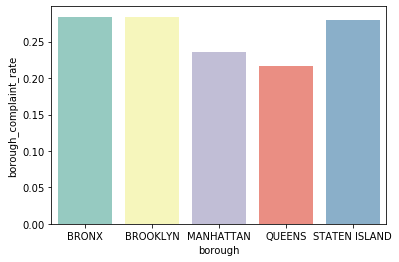

In [321]:
sns.barplot(x="borough", y="borough_complaint_rate", data=df_aggr, palette="Set3")

###### Based on results above, Brooklyn, Bronx, SI have similar percent of complaints for their popuations

#### Compute complainers by total city population

In [314]:
df_p

,borough,Population
0,BRONX,1592084.0
1,BROOKLYN,2732303.0
2,MANHATTAN,2073655.0
3,QUEENS,2755424.0
4,STATEN ISLAND,468730.0


In [315]:
total_population = df_p.Population.sum()
total_population

9622196.0

In [322]:
df_aggr['complaint_per_capita'] = df_aggr['Complaints']/total_population

In [323]:
df_aggr

,borough,Complaints,Population,borough_complaint_rate,complaint_per_capita
0,BRONX,451434,1592084.0,0.283549,0.046916
1,BROOKLYN,776580,2732303.0,0.284222,0.080707
2,MANHATTAN,490131,2073655.0,0.236361,0.050938
3,QUEENS,598097,2755424.0,0.217062,0.062158
4,STATEN ISLAND,131127,468730.0,0.279750,0.013628


Text(0.5, 1.0, 'Biggest Complainers')

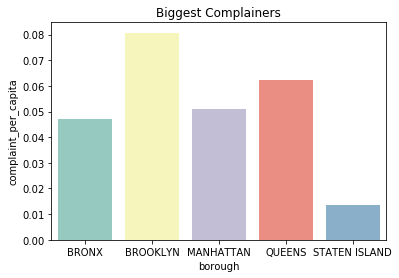

In [330]:
sns.barplot(x="borough", y="complaint_per_capita", data=df_aggr, palette="Set3")
plt.title("Biggest Complainers")

#### Brooklyn has the most complainers amongst all the boroughs

In [749]:
dfp.descriptor.value_counts()

Loud Music/Party                                                                    241110
ENTIRE BUILDING                                                                     137767
No Access                                                                            98478
APARTMENT ONLY                                                                       72983
Banging/Pounding                                                                     66015
Street Light Out                                                                     62555
Pothole                                                                              57951
Request Large Bulky Item Collection                                                  46481
Loud Talking                                                                         41556
PESTS                                                                                40246
Blocked Hydrant                                                                      39089

#### 3. Run this index focusing on one or two complaint types you’re curious about. 


#### Illegal parking

In [728]:
df_parking = dfp[dfp.complaint_type == 'Illegal Parking'][['created_date','descriptor','incident_zip','borough','Population']]

In [729]:
df_parking.head()

,created_date,descriptor,incident_zip,borough,Population
73,2017-01-01 00:19:07,Blocked Hydrant,11234.0,BROOKLYN,87757.0
80,2017-01-01 00:21:20,Blocked Hydrant,10017.0,MANHATTAN,16575.0
100,2017-01-01 00:24:46,Blocked Sidewalk,11417.0,QUEENS,28967.0
103,2017-01-01 00:25:16,Double Parked Blocking Vehicle,10031.0,MANHATTAN,56438.0
118,2017-01-01 00:28:43,Double Parked Blocking Vehicle,10451.0,BRONX,45713.0


In [731]:
# num of illegal parking complaints by borough
df_parking_borough = df_parking.borough.value_counts().to_frame()

In [737]:
df_parking_borough.reset_index(inplace=True)

In [740]:
df_parking_borough.columns = ['borough','num_complaints']

In [741]:
df_parking_borough

,borough,num_complaints
0,BROOKLYN,55442
1,QUEENS,46064
2,MANHATTAN,19730
3,BRONX,16125
4,STATEN ISLAND,8051


In [744]:
df_parking_borough = df_parking_borough.merge(df_p,on='borough')

In [746]:
df_parking_borough['compl_rate'] = df_parking_borough['num_complaints']/df_parking_borough['Population']

In [747]:
df_parking_borough

,borough,num_complaints,Population,compl_rate
0,BROOKLYN,55442,2732303.0,0.020291
1,QUEENS,46064,2755424.0,0.016718
2,MANHATTAN,19730,2073655.0,0.009515
3,BRONX,16125,1592084.0,0.010128
4,STATEN ISLAND,8051,468730.0,0.017176


Text(0.5, 1.0, 'Illegal parking by Borough')

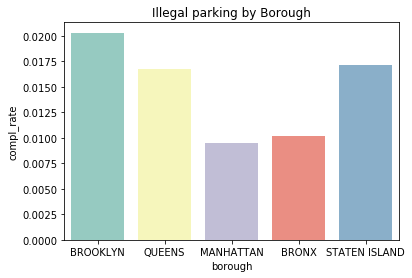

In [748]:
sns.barplot(x="borough", y="compl_rate", data=df_parking_borough, palette="Set3")
plt.title("Illegal parking by Borough")

#### descriptor = Noise: Construction Before/After Hours (NM1)

In [752]:
df_noise_construction = dfp[dfp.descriptor == 'Noise: Construction Before/After Hours (NM1)'][['created_date','complaint_type','incident_zip','borough','Population']]

In [754]:
df_noise_construction.complaint_type.value_counts()

Noise    27274
Name: complaint_type, dtype: int64

In [755]:
# If I select "Noise" under 'complaint_type', I get more num of records, since they can be of various types
df_n = dfp[dfp.complaint_type == 'Noise'][['created_date','descriptor','incident_zip','borough','Population']]

In [758]:
len(df_n)

60118

#### Focusing on construction noise - this would be further useful if analyzed at zipcode level and using maps.

In [760]:
df_construction = df_noise_construction.borough.value_counts().to_frame()

In [762]:
df_construction.reset_index(inplace=True)

MANHATTAN        15591
BROOKLYN          6826
QUEENS            3387
BRONX              916
STATEN ISLAND      554
Name: borough, dtype: int64

In [764]:
df_construction.columns = ['borough','num_complaints']

In [765]:
df_construction = df_construction.merge(df_p,on='borough')

In [50]:
#pd.set_option('display.max_rows',None)
dfp.descriptor.value_counts()

Loud Music/Party                    241110
ENTIRE BUILDING                     137767
No Access                            98478
APARTMENT ONLY                       72983
Banging/Pounding                     66015
                                     ...  
Amusement Ride Accident/Incident         1
Equipment Not Safe                       1
Accident/Explosion - Boiler              1
Lien Sale                                1
Color                                    1
Name: descriptor, Length: 983, dtype: int64

In [766]:
df_construction['compl_rate'] = df_construction['num_complaints']/df_construction['Population']

In [767]:
df_construction


,borough,num_complaints,Population,compl_rate
0,MANHATTAN,15591,2073655.0,0.007519
1,BROOKLYN,6826,2732303.0,0.002498
2,QUEENS,3387,2755424.0,0.001229
3,BRONX,916,1592084.0,0.000575
4,STATEN ISLAND,554,468730.0,0.001182


Text(0.5, 1.0, 'Construction Noise by Borough')

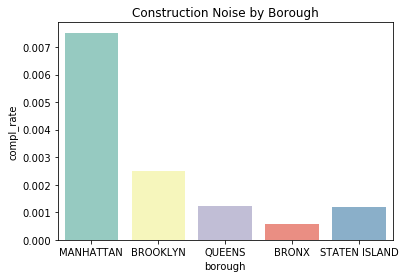

In [768]:
sns.barplot(x="borough", y="compl_rate", data=df_construction, palette="Set3")
plt.title("Construction Noise by Borough")

### Time Series / Exploratory Analysis

#### 1. Focus on complaints for “Loud Music / Party”. Create a graph of the rate of complaints by population over time for the city overall and each of the boroughs. Comment on any notable trends. 

In [38]:
# change datatype to datetime, for the created_date column
dfp.created_date = pd.to_datetime(dfp.created_date,  infer_datetime_format=True)

In [39]:
dfp['Month'] = dfp['created_date'].dt.month

In [40]:
df_loudmusic = dfp[dfp.descriptor == 'Loud Music/Party']

In [41]:
df_loudmusic.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,address_type,city,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,cross_street_1,cross_street_2,bbl,intersection_street_1,intersection_street_2,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,landmark,vehicle_type,Zip Code ZCTA,Population,Month
37,35138317,2017-01-01 00:02:54,2017-01-01T00:46:54.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11209.0,255 79 STREET,79 STREET,ADDRESS,BROOKLYN,Precinct,Closed,2017-01-01T08:02:54.000,The Police Department responded to the complai...,2017-01-01T00:46:54.000,10 BROOKLYN,BROOKLYN,975863.0,168391.0,PHONE,Unspecified,BROOKLYN,40.628867,-74.030215,"{'latitude': '40.6288669', 'longitude': '-74.0...",RIDGE BOULEVARD,3 AVENUE,3.059680e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11209.0,68853.0,1
38,35139300,2017-01-01 00:03:41,2017-01-01T03:49:13.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10040.0,60 THAYER STREET,THAYER STREET,ADDRESS,NEW YORK,Precinct,Closed,2017-01-01T08:03:41.000,The Police Department responded to the complai...,2017-01-01T03:49:14.000,12 MANHATTAN,MANHATTAN,1004393.0,253922.0,MOBILE,Unspecified,MANHATTAN,40.863609,-73.927177,"{'latitude': '40.8636089', 'longitude': '-73.9...",SHERMAN AVENUE,BROADWAY,1.021750e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10040.0,41905.0,1
42,35138401,2017-01-01 00:06:04,2017-01-01T01:52:03.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11691.0,13-32 GRANDVIEW TERRACE,GRANDVIEW TERRACE,ADDRESS,FAR ROCKAWAY,Precinct,Closed,2017-01-01T08:06:04.000,The Police Department responded to the complai...,2017-01-01T01:52:03.000,14 QUEENS,QUEENS,1054329.0,157973.0,MOBILE,Unspecified,QUEENS,40.599999,-73.747642,"{'latitude': '40.5999986', 'longitude': '-73.7...",CAFFREY AVENUE,DEAD END,4.156210e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11691.0,60035.0,1
44,35139201,2017-01-01 00:08:24,2017-01-01T06:43:42.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10458.0,3013 VALENTINE AVENUE,VALENTINE AVENUE,ADDRESS,BRONX,Precinct,Closed,2017-01-01T08:08:24.000,The Police Department responded to the complai...,2017-01-01T06:43:42.000,07 BRONX,BRONX,1015941.0,257274.0,MOBILE,Unspecified,BRONX,40.872775,-73.885411,"{'latitude': '40.8727752', 'longitude': '-73.8...",EAST 201 STREET,EAST 202 STREET,2.033070e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10458.0,79492.0,1
46,35138514,2017-01-01 00:09:22,2017-01-01T01:27:35.000,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,DEGRAW STREET,ADDRESS,BROOKLYN,Precinct,Closed,2017-01-01T08:09:22.000,The Police Department responded to the complai...,2017-01-01T01:27:35.000,06 BROOKLYN,BROOKLYN,988846.0,186711.0,PHONE,Unspecified,BROOKLYN,40.679154,-73.983430,"{'latitude': '40.6791541', 'longitude': '-73.9...",3 AVENUE,4 AVENUE,3.004270e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11217.0,35881.0,1


In [42]:
cols_to_keep = ['unique_key', 'created_date','complaint_type','descriptor','incident_zip','city','borough',
        'Zip Code ZCTA','Population', 'Month']

In [43]:
df_loudmusic = df_loudmusic[df_loudmusic.columns[df_loudmusic.columns.isin(cols_to_keep)]]

In [57]:
df_loudmusic.groupby('Month')['complaint_type'].value_counts()

Month  complaint_type          
1      Noise - Residential         10218
       Noise - Commercial           2876
       Noise - Street/Sidewalk      1066
       Noise - House of Worship       26
       Noise - Park                   26
2      Noise - Residential          8777
       Noise - Commercial           2442
       Noise - Street/Sidewalk      1309
       Noise - Park                   54
       Noise - House of Worship       18
3      Noise - Residential          8979
       Noise - Commercial           2465
       Noise - Street/Sidewalk      1114
       Noise - House of Worship       31
       Noise - Park                   29
4      Noise - Residential         13208
       Noise - Street/Sidewalk      4369
       Noise - Commercial           3367
       Noise - Park                  193
       Noise - House of Worship       51
5      Noise - Residential         14183
       Noise - Street/Sidewalk      5339
       Noise - Commercial           3262
       Noise - Park      

In [336]:
#Rate of complaints by population over time for the city overall

In [44]:
grouped_month = df_loudmusic.groupby('Month').size().to_frame()

In [45]:
grouped_month.reset_index(inplace=True)
grouped_month.columns = ['Month','Complaints']

In [46]:
grouped_month

,Month,Complaints
0,1,14212
1,2,12600
2,3,12618
3,4,21188
4,5,23151
5,6,27967
6,7,28534
7,8,25067
8,9,26525
9,10,21724


In [ ]:
grouped_month['complaint_rate'] = grouped_month['Complaints']/total_population

Text(0.5, 1.0, 'Complaint Rate by Population - City')

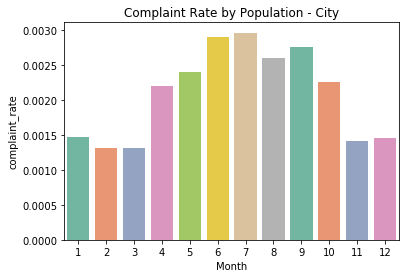

In [335]:
sns.barplot(x="Month", y="complaint_rate", data=grouped_month, palette="Set2")
plt.title("Complaint Rate by Population - City")

In [ ]:
#Rate of complaints for each of the borough.

In [60]:
grouped_borough = df_loudmusic.groupby(['borough','Month']).size().to_frame()

In [61]:
grouped_borough.reset_index(inplace=True)

In [62]:
grouped_borough.rename(columns={0:'Complaints'},inplace=True)

In [63]:
grouped_borough.head()

,borough,Month,Complaints
0,BRONX,1,3570
1,BRONX,2,3036
2,BRONX,3,2988
3,BRONX,4,4437
4,BRONX,5,4511


In [ ]:
# the chart below is showing NUMBER of complaints by borough.

#### Number of complaints, time period = month

Text(0.5, 1.0, 'Number of Complaints by Borough')

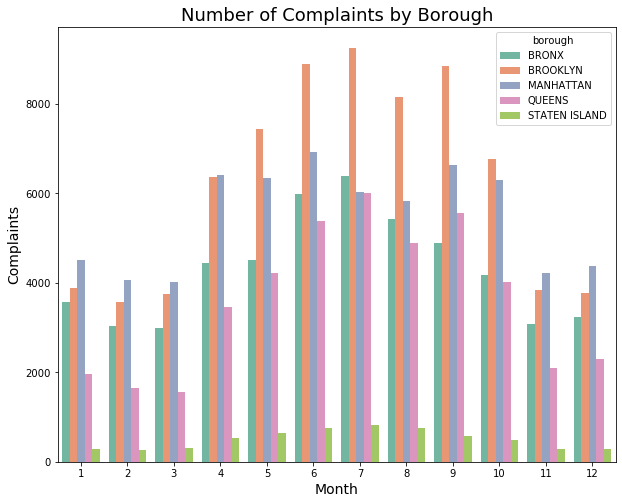

In [883]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Month", y="Complaints", hue="borough", data=grouped_borough, palette="Set2");
plt.ylabel("Complaints", size=14)
plt.xlabel("Month", size=14)
plt.title("Number of Complaints by Borough", size=18)


In [52]:
total_population = df_p.Population.sum()

In [53]:
total_population

9622196.0

In [55]:
grouped_borough.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   borough     60 non-null     object
 1   Month       60 non-null     int64 
 2   Complaints  60 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


In [72]:
df_borough = grouped_borough.merge(df_p,left_on='borough',right_on='borough',how='left')

In [338]:
df_borough.head()

,borough,Month,Complaints,Population,comp_rate
0,BRONX,1,3570,1592084.0,0.002242
1,BRONX,2,3036,1592084.0,0.001907
2,BRONX,3,2988,1592084.0,0.001877
3,BRONX,4,4437,1592084.0,0.002787
4,BRONX,5,4511,1592084.0,0.002833


In [74]:
df_borough['comp_rate'] = df_borough['Complaints']/df_borough['Population']

In [339]:
# for the TOTAL population of the city
df_borough['rate_of_complaints_by_population'] = df_borough['Complaints']/total_population

In [340]:
df_borough.head()

,borough,Month,Complaints,Population,comp_rate,rate_of_complaints_by_population
0,BRONX,1,3570,1592084.0,0.002242,0.000371
1,BRONX,2,3036,1592084.0,0.001907,0.000316
2,BRONX,3,2988,1592084.0,0.001877,0.000311
3,BRONX,4,4437,1592084.0,0.002787,0.000461
4,BRONX,5,4511,1592084.0,0.002833,0.000469


#### Plot shows rate of complaints by borough..rate is against borough population and timeline is by month.

Text(0.5, 1.0, 'Complaint Rate by Borough Population')

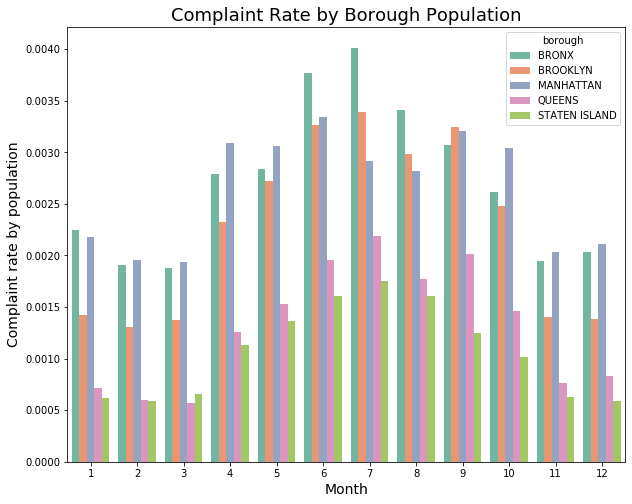

In [884]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Month", y="comp_rate", hue="borough", data=df_borough, palette="Set2");
plt.ylabel("Complaint rate by population", size=14)
plt.xlabel("Month", size=14)
plt.title("Complaint Rate by Borough Population", size=18)


#### Above shows complaint rate by borough population. This rate increases in summer across all boroughs and interestingly, even for SI, when adjusted for population of the borough. Loud music/parties are expected to increase in summer - longer daylight, out door events etc. Bronx seems to have the highest complaint rate through the year (except for one month) and Brooklyn is close behind.  

#### chart below computes rate of complaints per borough per month by total population

Text(0.5, 1.0, 'Rate of Complaints by Total Population')

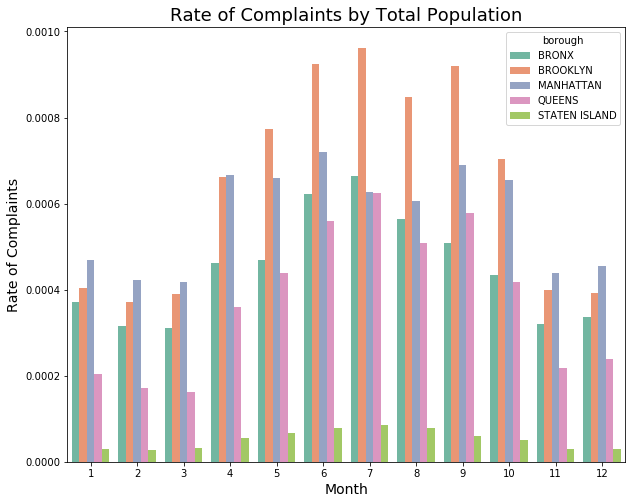

In [342]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Month", y="rate_of_complaints_by_population", hue="borough", data=df_borough, palette="Set2");
plt.ylabel("Rate of Complaints", size=14)
plt.xlabel("Month", size=14)
plt.title("Rate of Complaints by Total Population", size=18)

#### Based on the chart above, rate of complaints by city population is highest for Brooklyn half year and is close to same levels as that for Manhattan for the remaining half year (mostly winter months). Overall complaint rate is high in summer (naturally), since we are looking at complaints for "loud music/party", owing to bars staying open late, outdoor events etc. The trend of increase is seen across boroughs, although the increase is not very significant for SI.

### 2. Which zip codes have shown the largest increase in these complaints over time? Develop some filter to make sure that the growth rates aren’t merely an artifact of low volumes. 

In [351]:
#dfp.groupby('incident_zip')['complaint_type'].value_counts().nlargest(20)

In [84]:
# num of distinct zip codes in the entire dataset.
dfp.incident_zip.nunique()

261

#### For the complaints = "Loud Music/Party", dataset contains 200 unique zipcodes

In [395]:
df_loudmusic.incident_zip.nunique()

200

In [397]:
df_zip = df_loudmusic.groupby(['incident_zip'])['Month'].value_counts().to_frame()

In [398]:
df_zip.head()

Month
incident_zip Month       
10000.0      7         18
             8         17
             9         14
             6         13
             10         8

In [399]:
df_zip.columns = ['num_complaints']

In [401]:
df_zip.reset_index(inplace=True)
df_zip.head()

,incident_zip,Month,num_complaints
0,10000.0,7,18
1,10000.0,8,17
2,10000.0,9,14
3,10000.0,6,13
4,10000.0,10,8


In [403]:
df_zip_sorted = df_zip.groupby(['incident_zip','Month']).agg({'num_complaints':sum})

In [407]:
df_zip_sorted.head()

num_complaints
incident_zip Month                
10000.0      1                   2
             2                   1
             4                   4
             5                   5
             6                  13

In [408]:
# some zip codes have data for less than 12 months
zip_counts = df_zip['incident_zip'].value_counts()
zip_counts

10017.0    12
11691.0    12
10010.0    12
11223.0    12
11358.0    12
10469.0    12
11372.0    12
10009.0    12
11421.0    12
11428.0    12
10456.0    12
10305.0    12
10460.0    12
10007.0    12
10006.0    12
11205.0    12
10451.0    12
11233.0    12
10005.0    12
11224.0    12
10306.0    12
10011.0    12
10470.0    12
10459.0    12
11429.0    12
11436.0    12
11217.0    12
11222.0    12
11101.0    12
10468.0    12
10016.0    12
10463.0    12
11106.0    12
11367.0    12
10303.0    12
10014.0    12
11411.0    12
11418.0    12
10013.0    12
11204.0    12
11232.0    12
10012.0    12
10003.0    12
11373.0    12
11366.0    12
10453.0    12
11216.0    12
11415.0    12
10462.0    12
11365.0    12
11379.0    12
10304.0    12
10128.0    12
11207.0    12
11356.0    12
11422.0    12
11235.0    12
11370.0    12
11412.0    12
11433.0    12
10310.0    12
11226.0    12
11105.0    12
10472.0    12
11693.0    12
11423.0    12
10002.0    12
11206.0    12
10312.0    12
10001.0    12
10461.0    12
11364.

#### Filter 1 - Consider only zipcodes with data for all 12 months


In [409]:
df_zip_filtered = df_zip[df_zip['incident_zip'].isin(zip_counts[zip_counts == 12].index)]

In [410]:
# zipcode count went down from 200 to 165.
df_zip_filtered.incident_zip.nunique()

165

In [411]:
#num of rows (165*12)
len(df_zip_filtered)

1980

#### Filter 2 - getting stats on zipcode counts to filter those with low volumes

In [412]:
zip_complaints = df_zip_filtered.groupby('incident_zip')['num_complaints'].sum()
zip_complaints

incident_zip
10001.0     860
10002.0    3832
10003.0    2337
10005.0     142
10006.0      50
10007.0     313
10009.0    3681
10010.0     592
10011.0    1253
10012.0    1544
10013.0     882
10014.0    1167
10016.0    1128
10017.0     434
10018.0     352
10019.0     934
10021.0     290
10022.0     471
10023.0     884
10024.0    1038
10025.0    2229
10026.0    2100
10027.0    2660
10028.0     936
10029.0    2904
10030.0    1742
10031.0    5521
10032.0    4636
10033.0    3805
10034.0    4231
10035.0    1394
10036.0    1495
10037.0     808
10038.0     369
10039.0    1899
10040.0    4739
10065.0     216
10075.0     370
10128.0     960
10301.0     680
10302.0     435
10303.0     474
10304.0    1009
10305.0     440
10306.0     558
10308.0     292
10310.0     793
10312.0     428
10314.0     631
10451.0    2045
10452.0    4083
10453.0    3203
10454.0    1044
10455.0    1564
10456.0    3830
10457.0    3685
10458.0    3610
10459.0    1955
10460.0    2499
10461.0     989
10462.0    1552
10463.0    

In [413]:
zip_complaints.describe()

count     165.000000
mean     1454.260606
std      1281.711308
min        35.000000
25%       460.000000
50%      1026.000000
75%      1957.000000
max      5521.000000
Name: num_complaints, dtype: float64

#### get zipcodes with atleast 1000 complaints (loud music/party) in the year

In [422]:
df_zip_filter2 = df_zip_filtered[df_zip_filtered['incident_zip'].isin(zip_complaints[zip_complaints > 1000].index)]

In [423]:
df_zip_filter2.head()

,incident_zip,Month,num_complaints
22,10002.0,4,485
23,10002.0,9,430
24,10002.0,10,406
25,10002.0,6,372
26,10002.0,7,339


In [424]:
df_zip_filter2.groupby(['incident_zip','Month']).agg({'num_complaints':sum})

num_complaints
incident_zip Month                
10002.0      1                 238
             2                 212
             3                 252
             4                 485
             5                 335
             6                 372
             7                 339
             8                 269
             9                 430
             10                406
             11                244
             12                250
10003.0      1                 186
             2                 194
             3                 145
             4                 251
             5                 239
             6                 217
             7                 141
             8                 130
             9                 190
             10                304
             11                179
             12                161
10009.0      1                 200
             2                 273
             3                 224
             4                 401
             5                 380
             6                 365
             7                 280
             8                 280
             9                 432
             10                354
             11                253
             12                239
10011.0      1                  83
             2                 104
             3                  76
             4                 136
             5                  96
             6                 117
             7                  69
             8                  80
             9                 101
             10                155
             11                101
             12                135
10012.0      1                 129
             2                  89
             3                 120
             4                 191
             5                 150
             6                 128
             7                  75
             8                 116
             9                 139
             10                204
             11                112
             12                 91
10014.0      1                 104
             2                 105
             3                  94
             4                 132
             5                 113
             6                 101
             7                  64
             8                  62
             9                  86
             10                159
             11                 59
             12                 88
10016.0      1                 128
             2                  68
             3                  80
             4                  92
             5                  80
             6                  88
             7                  67
             8                  87
             9                 126
             10                109
             11                110
             12                 93
10024.0      1                  78
             2                  71
             3                  69
             4                  94
             5                  91
             6                  72
             7                  72
             8                  98
             9                  87
             10                135
             11                 82
             12                 89
10025.0      1                 111
             2                 157
             3                 191
             4                 220
             5                 204
             6                 199
             7                 160
             8                 168
             9                 281
             10                253
             11                158
             12                127
10026.0      1                  88
             2                 115
             3                 105
             4                 200
             5                

In [421]:
# after removing zipcodes with fewer than 12 months of data and those with fewer than 1000 complaints, remaining zip codes total 85
df_zip_filter2.incident_zip.nunique()


85

In [425]:
# get zipcodes after filtering
zip_unique = df_zip_filter2.incident_zip.value_counts()

In [426]:
zip_unique = zip_unique.to_frame()

In [427]:
zip_unique.reset_index(inplace=True)

In [428]:
zip_unique.columns = ['zip_code','n_months']
zip_unique.drop(columns='n_months',inplace=True)

In [429]:
zip_list = zip_unique.zip_code.tolist()


In [431]:
len(zip_list)

85

In [432]:
# get total complaints for each zip
zip_num_complaints = df_zip_filter2.groupby('incident_zip')['num_complaints'].sum()

In [433]:
type(zip_num_complaints)

pandas.core.series.Series

#### Now, create a df that only contains the relevant zipcodes after the two levels of filters, and for "Loud Music/Party" complaints.

In [434]:
df_party = df_loudmusic[df_loudmusic.incident_zip.isin(zip_list)]

In [435]:
df_party.head()

,unique_key,created_date,complaint_type,descriptor,incident_zip,city,borough,Zip Code ZCTA,Population,Month
37,35138317,2017-01-01 00:02:54,Noise - Residential,Loud Music/Party,11209.0,BROOKLYN,BROOKLYN,11209.0,68853.0,1
38,35139300,2017-01-01 00:03:41,Noise - Residential,Loud Music/Party,10040.0,NEW YORK,MANHATTAN,10040.0,41905.0,1
42,35138401,2017-01-01 00:06:04,Noise - Residential,Loud Music/Party,11691.0,FAR ROCKAWAY,QUEENS,11691.0,60035.0,1
44,35139201,2017-01-01 00:08:24,Noise - Residential,Loud Music/Party,10458.0,BRONX,BRONX,10458.0,79492.0,1
46,35138514,2017-01-01 00:09:22,Noise - Commercial,Loud Music/Party,11217.0,BROOKLYN,BROOKLYN,11217.0,35881.0,1


#### function to compute growth rate (largest_increase) of complaints over time for zipcodes. The data is aggregated at day level and the best fit line gives the growth rate

In [772]:
from sklearn.linear_model import LinearRegression

def get_zipcode_growth_rate(df,zip_list):
    growth_rate = {}
    intercept = {}
    for z in zip_list:
        df_zip = pd.DataFrame()
        df_zip = df[df.incident_zip == z][['created_date','borough','Population','Month']]
        df_zip['date_only'] = df_zip['created_date'].dt.date
        df_ts = pd.DataFrame()
        df_ts = df_zip['date_only'].value_counts().to_frame()
        df_ts.reset_index(inplace=True)
        df_ts.columns = ['date_only','num_complaints']
        df_sorted = df_ts.sort_values(by='date_only')
        df_sorted.reset_index(drop=True,inplace=True)
        #print(z,"\n",df_sorted.head(10),"\n",df_sorted.describe())
        
        # get slope for the complaints count for each zipcode
        len_data = len(df_sorted)
        lr = LinearRegression()        
             
        s = np.arange(1,len_data+1).tolist()
        df_sorted['ts'] = s
               
        X = df_sorted['ts'].values.reshape(-1,1)
        y = df_sorted['num_complaints'].values  
                        
        lr.fit(X,y)
        slope = lr.coef_  # this returns a np.ndarray
        growth_rate[z] = slope.item()
        intercept[z] = lr.intercept_  
    
    growth_sorted = sorted(growth_rate.items(),key=lambda x: x[1],reverse=True)
    
    return growth_sorted,intercept 


In [773]:
growth, intercept = get_zipcode_growth_rate(df_party,zip_list)

In [776]:
# top 20 with most increase in loud music complaints over time
zipcode_compl_growth = growth[:20]

In [824]:
df_zip20 = pd.DataFrame(zipcode_compl_growth, columns=['zip', 'growth'])

In [833]:
df_zip20.sort_values(by='growth',inplace=True,ascending=False)

In [849]:
df_zip20.head()

,zip,growth
0,11419.0,0.019760
1,10467.0,0.018782
2,11102.0,0.012488
3,10032.0,0.011525
4,11236.0,0.010759


Text(0.5, 1.0, 'Top 20 Zipcodes with most increase in complaints')

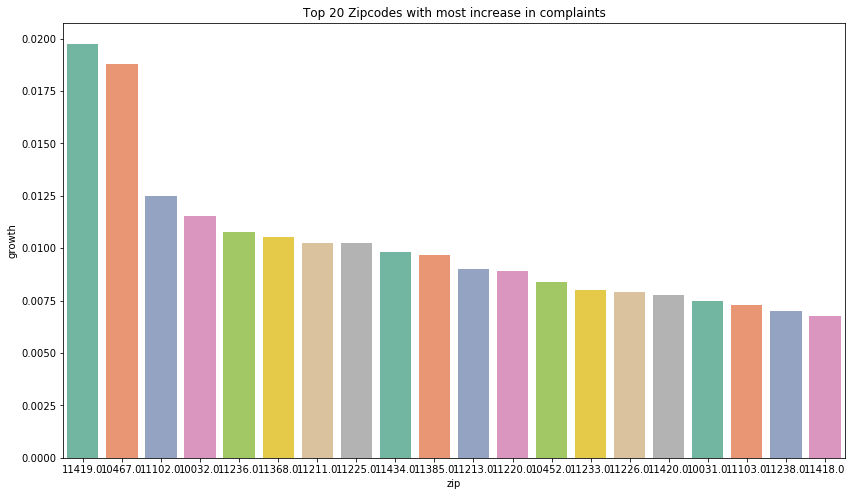

In [885]:
plt.figure(figsize=(14,8))
sns.barplot(x="zip", y="growth",data=df_zip20, order = df_zip20['zip'],  palette="Set2")
plt.title("Top 20 Zipcodes with most increase in complaints")

#### Scatter plot for the zipcode with the highest increase in complaints with best fit line.

In [ ]:
#For zipcode 11419

In [868]:
dfz1 = df_party[df_party['incident_zip'] == 11419.0][['created_date','complaint_type']]
dfz1['created_date'] = pd.to_datetime(dfz1.created_date)
dfz1['date'] = dfz1['created_date'].dt.date
#dfz1.date = dfz1.date.apply(date2num)

In [869]:
dfz1_ts = dfz1['date'].value_counts().to_frame()

In [870]:
dfz1_ts.columns = ['num_complaints']

In [871]:
dfz1_ts.reset_index(inplace=True)

In [872]:
dfz1_ts.columns = ['date_only','num_compl']

In [873]:
dfz1_ts.sort_values(by='date_only',inplace=True)
l = len(dfz1_ts)
s = np.arange(1,l+1).tolist()
ts = dfz1_ts
ts['ts'] = s

dfz1_ts.head()

,date_only,num_compl,ts
110,2017-01-01,4,1
257,2017-01-05,1,2
236,2017-01-07,1,3
163,2017-01-08,2,4
253,2017-01-14,1,5


In [874]:
ts.reset_index(inplace=True,drop=True)
ts.head()

,date_only,num_compl,ts
0,2017-01-01,4,1
1,2017-01-05,1,2
2,2017-01-07,1,3
3,2017-01-08,2,4
4,2017-01-14,1,5


In [875]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
y = ts['num_compl'].values
X = ts['ts'].values.reshape(-1,1)

regressor.fit(X,y)
print(regressor.coef_, regressor.intercept_)

[0.01975994] 4.343561005382011


Text(0.5, 1.0, 'Zip:11419')

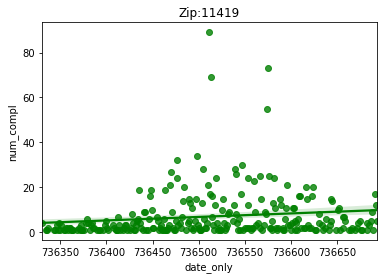

In [878]:
from matplotlib.dates import date2num 
#ts.date_only = ts.date_only.apply(date2num)
sns.regplot(ts['date_only'],ts['num_compl'],color='g')
plt.title("Zip:11419")

## Modeling

#### Modeling approach to predict future complaint levels 
-	For this discussion, I will focus only on complaint levels, so will skip features related to resolution, community board, agency, closed_date.
-	Also, I can treat dataset as time series to observe increase/decrease over time for a given complaint_type or zipcode but otherwise just focusing on complaint levels.


#### Cleaning/Processing data:
-	Ensure the data is clean and structured in the required format before any analyses is performed.
-	Missing data and methods to handle it depending on proportion and type of data points that are missing. Such as fillna(0) for few missing values.
-	Discard data that are irrelevant (for eg., “unspecified” borough in 311 data had data from other states!)
-	Check for datatypes of feature and make any required conversions.. for eg., datetime, float, int, string etc.
    

#### Modeling/Model Selection:
-	I would use a regressor (Linear, Ridge) to predict future complaints. 
-	Flexibility of linear regression models scales with the number of features, but are less likely to overfit. And they have high explicability. 
-	If linear regressor performance is unsatisfactory, I will go with Ridge, since this dataset does not have too many features and hyperparameter in Ridge will allow me to penalize the high coefficient values without increasing model complexity.
-	However,  as the dataset grows (several thousands to millions of rows.. ) , linear regression *may* converge quickly or does not improve with more data.. In this case, Random Forest would be a good algorithm since they perform well for large datasets and modeler can control/set the num of trees. Further, they can be parallelized. 
-	I am also curious to explore if training models for each subset/cluster complaint_type (especially, if they are aggregated into fewer types) and use their predictions as features for a final regressor would give favorable results.
-	Cross validation: If am using a model other than a random forest (or similar), I would use cross validation (GridsearchCV or RandomizedsearchCV in sklearn) to find the best parameters for the model. 



#### Feature Selection:
From a preliminary analysis, I will begin with the following from the 311 dataset:
-	unique_key
-	created_date
-	complaint_type
-	descriptor
-	location_type
-	incident_zip
-	incident_address
-	street_name
-	city
-	borough
       
Census data:
-	zip
-	population

Socioeconomic/demographic data: (obtaining the below might itself involve work)
-	median_income
-	education_level

To further validate the selection of features and aid in feature engineering.. a few analyses I would consider:
-	look for trends in each complaint type over the years/months
-	look for trends by borough, city, zipcodes.
-	Heatmap of complaint_type vs. location (type, zipcode etc. )
-	Heatmap of other categorical features. 
-	Explore possibilities of aggregating complaint_types by area, and perhaps results in fewer complaint_types. This could address the data imbalance issue, since a few complaint types have high frequency. 


#### Feature Engineering:
This step can overlap with the previous one and also with overall modelling process. 
-	I would try clustering (K-means) using complaint_types and zipcodes/neighborhoods. (in extension to one of the analyses in the previous step). The resulting clusters may be used as predictors in a regressor, if the clusters display coherent groupings with similar trends. I will have to implement it to check for results. For each zipcode, get the num of complaints for each complaint type and the total complaints for that zipcode.. 
-	Try to aggregate/reduce types for ‘location_type’ since “Residential Building” and “Residential Building & House” are very similar location types.
-	One-hot-encoder could also be used to represent the complaint_type (each complaint type is assumed to be independent of another) data, but it could lead to high correlation between variables and is not nice to work with when there are too many variables. 


#### Evaluating performance:
-	Check for relevant metrics, R-square, adjusted R-square, residual plots etc. 
-	If the model is overfitting, check the coefficients from the model and penalize over a range of values( alpha for Ridge), usually using cross validation to choose the best value of alpha.
-	Underfitting and Overfitting are handled based on the type of model, number of features, observations to begin with. In this case, for Ridge, tune hyperparameter alpha. Underfitting: Linear regression may miss non-linear relationships. Visualization of data/exploratory analysis can identify such relationships and then be incorporated using feature engineering. SGDRegressor is also a useful optimization method and is not computationally expensive.


#### To conclude, it is a fluid iterative process in terms of modifications to features, scaling data, tuning parameters etc., until satisfactory results are obtained. It is also not uncommon to train several models and pick the best one.